In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPool2D
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
train = pd.read_csv('resources/mnist_train.csv')

In [3]:
np.random.seed(10)

remove_n = 45000
drop_indices = np.random.choice(train.index, remove_n, replace=False)
train_subset = train.drop(drop_indices)

In [4]:
Y_train = train_subset["label"]
X_train = train_subset.drop(labels = ["label"],axis = 1) 

In [5]:
Y_train.value_counts()

1    1713
7    1550
8    1518
9    1515
3    1511
0    1504
4    1487
6    1472
2    1429
5    1301
Name: label, dtype: int64

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)

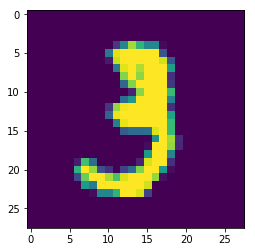

In [7]:
g = plt.imshow(X_train[3][:,:,0])

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
images_train, images_val, labels_train, labels_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

In [14]:
images_train.shape

(12000, 28, 28, 1)

In [15]:
neural_network = Sequential()
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu', input_shape = (28,28,1)))
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu'))
neural_network.add(MaxPool2D(pool_size=(2, 2)))
neural_network.add(Dropout(0.25))

neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network.add(MaxPool2D(pool_size=(2, 2)))
neural_network.add(Dropout(0.25))

neural_network.add(GlobalAveragePooling2D())
neural_network.add(Dense(10, activation="softmax"))

In [16]:
neural_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [17]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
neural_network.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
epochs = 10
batch_size = 30
neural_network.fit(np.array(images_train), np.array(labels_train), batch_size=batch_size,
                             epochs=epochs, validation_data=(np.array(images_val), np.array(labels_val)), verbose=2,
                             callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Train on 12000 samples, validate on 3000 samples
Epoch 1/10
 - 27s - loss: 1.1152 - acc: 0.6628 - val_loss: 0.1622 - val_acc: 0.9530
Epoch 2/10
 - 26s - loss: 0.2270 - acc: 0.9347 - val_loss: 0.0878 - val_acc: 0.9723
Epoch 3/10
 - 26s - loss: 0.1409 - acc: 0.9582 - val_loss: 0.0789 - val_acc: 0.9783
Epoch 4/10
 - 26s - loss: 0.1109 - acc: 0.9672 - val_loss: 0.0824 - val_acc: 0.9743
Epoch 5/10
 - 26s - loss: 0.0866 - acc: 0.9734 - val_loss: 0.0639 - val_acc: 0.9800
Epoch 6/10
 - 26s - loss: 0.0727 - acc: 0.9792 - val_loss: 0.0760 - val_acc: 0.9747
Epoch 7/10
 - 26s - loss: 0.0678 - acc: 0.9806 - val_loss: 0.0690 - val_acc: 0.9793
Epoch 8/10
 - 26s - loss: 0.0553 - acc: 0.9829 - val_loss: 0.0499 - val_acc: 0.9843
Epoch 9/10
 - 26s - loss: 0.0553 - acc: 0.9847 - val_loss: 0.0702 - val_acc: 0.9833
Epoch 10/10
 - 26s - loss: 0.0487 - acc: 0.9844 - val_loss: 0.0574 - val_acc: 0.9850


In [19]:
neural_network_augm = Sequential()
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu', input_shape = (28,28,1)))
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu'))
neural_network_augm.add(MaxPool2D(pool_size=(2, 2)))
neural_network_augm.add(Dropout(0.25))

neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network_augm.add(MaxPool2D(pool_size=(2, 2)))
neural_network_augm.add(Dropout(0.25))

neural_network_augm.add(GlobalAveragePooling2D())
neural_network_augm.add(Dense(10, activation="softmax"))

In [20]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
neural_network_augm.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest')

datagen.fit(images_train)

In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
epochs = 10
batch_size = 30
neural_network_augm.fit_generator(datagen.flow(images_train, labels_train, batch_size=batch_size),
                             epochs=epochs, validation_data=(np.array(images_val), np.array(labels_val)), verbose=2,
                             steps_per_epoch=images_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/10
 - 26s - loss: 1.3105 - acc: 0.5967 - val_loss: 0.2291 - val_acc: 0.9333
Epoch 2/10
 - 26s - loss: 0.3486 - acc: 0.8912 - val_loss: 0.1257 - val_acc: 0.9640
Epoch 3/10
 - 26s - loss: 0.2187 - acc: 0.9336 - val_loss: 0.0879 - val_acc: 0.9730
Epoch 4/10
 - 26s - loss: 0.1705 - acc: 0.9476 - val_loss: 0.1196 - val_acc: 0.9667
Epoch 5/10
 - 26s - loss: 0.1470 - acc: 0.9569 - val_loss: 0.0806 - val_acc: 0.9777
Epoch 6/10
 - 26s - loss: 0.1270 - acc: 0.9619 - val_loss: 0.0876 - val_acc: 0.9727
Epoch 7/10
 - 26s - loss: 0.1146 - acc: 0.9656 - val_loss: 0.0565 - val_acc: 0.9810
Epoch 8/10
 - 26s - loss: 0.1094 - acc: 0.9682 - val_loss: 0.1157 - val_acc: 0.9627
Epoch 9/10
 - 26s - loss: 0.0970 - acc: 0.9708 - val_loss: 0.0603 - val_acc: 0.9803
Epoch 10/10
 - 26s - loss: 0.0943 - acc: 0.9727 - val_loss: 0.0451 - val_acc: 0.9873


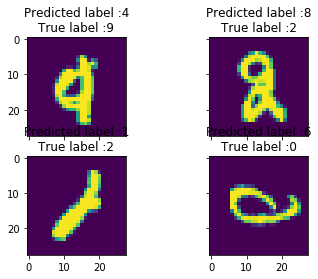

In [23]:
predictions = neural_network.predict(images_val)
# Convert to one hot vectors
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_val, axis=1)

# extract method and move to error_analyser
errors = predicted_labels - true_labels != 0

numerical_values_of_predicted_errors = predictions[errors]
predicted_probabilities_of_errors = np.max(numerical_values_of_predicted_errors, axis=1)

labels_of_incorrectly_classified_images = true_labels[errors]
predicted_probabilities_of_correct_images \
    = np.diagonal(np.take(numerical_values_of_predicted_errors, labels_of_incorrectly_classified_images, axis=1))

differences_of_probabilities = predicted_probabilities_of_errors - predicted_probabilities_of_correct_images
sorted_differences = np.argsort(differences_of_probabilities)

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
        n = 0
        nrows = 2
        ncols = 2
        fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
        for row in range(nrows):
            for col in range(ncols):
                error = errors_index[n]
                ax[row, col].imshow((img_errors[error]).reshape((28, 28)))
                ax[row, col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error], obs_errors[error]))
                n += 1

# Top 4 errors
if len(sorted_differences) >= 4:
    most_important_errors = sorted_differences[-4:]
    display_errors(most_important_errors, images_val[errors],
                                  predicted_labels[errors], labels_of_incorrectly_classified_images)
    plt.show()
